In [3]:
# Import pandas as change max columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer


## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib


## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)

In [2]:
import joblib
loaded = joblib.load('sales_prediction_models.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'LinearRegression', 'RandomForest'])

In [4]:
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
lin_reg = loaded['LinearRegression']
rand_forest = loaded['RandomForest']

## SHAP

In [7]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [8]:
len(X_train_df)

6392

In [9]:
X_shap = shap.sample(X_train_df,nsamples=400,random_state=321)
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3888,15.85,0.110653,36.9506,2007.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2497,15.10,0.087407,221.8456,1997.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7723,17.50,0.015592,184.8266,2002.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8117,10.80,0.049820,243.2144,2002.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7475,15.00,0.044999,140.4838,2002.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [10]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap 

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
292     1379.5376
3035    2956.1520
6832    1259.6936
8455    4206.5244
7795     605.8780
Name: Item_Outlet_Sales, Length: 400, dtype: float64

## Random Forest

### Create a model explainer


In [11]:
explainer = shap.Explainer(rand_forest)
explainer

In [12]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [13]:
X_shap.shape


(400, 13)

In [14]:
shap_values.shape

(400, 13)

In [15]:
shap_values[0]

.values =
array([-2.46033433e-01, -7.00673146e+00, -1.66776412e+03,  5.84081851e+01,
        7.11504371e+00, -5.70440376e+00, -2.64823604e+01, -5.49350072e-01,
       -1.78621581e+00, -1.04122544e+00,  2.02894039e+02, -2.21704533e+01,
       -1.00720263e+02])

.base_values =
array([2207.5242624])

.data =
array([1.58500000e+01, 1.10653377e-01, 3.69506000e+01, 2.00700000e+03,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

### Bar Plot

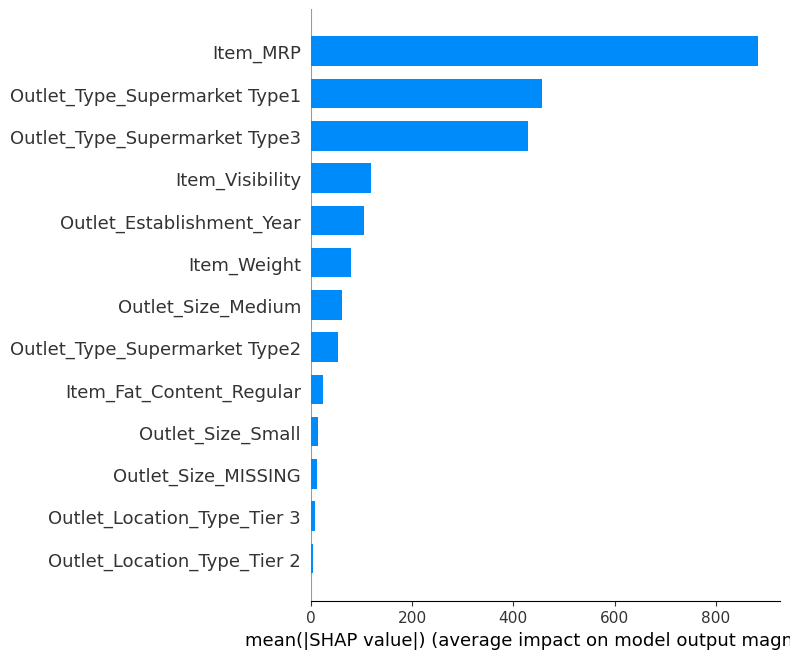

In [16]:
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')

### Feature Importance

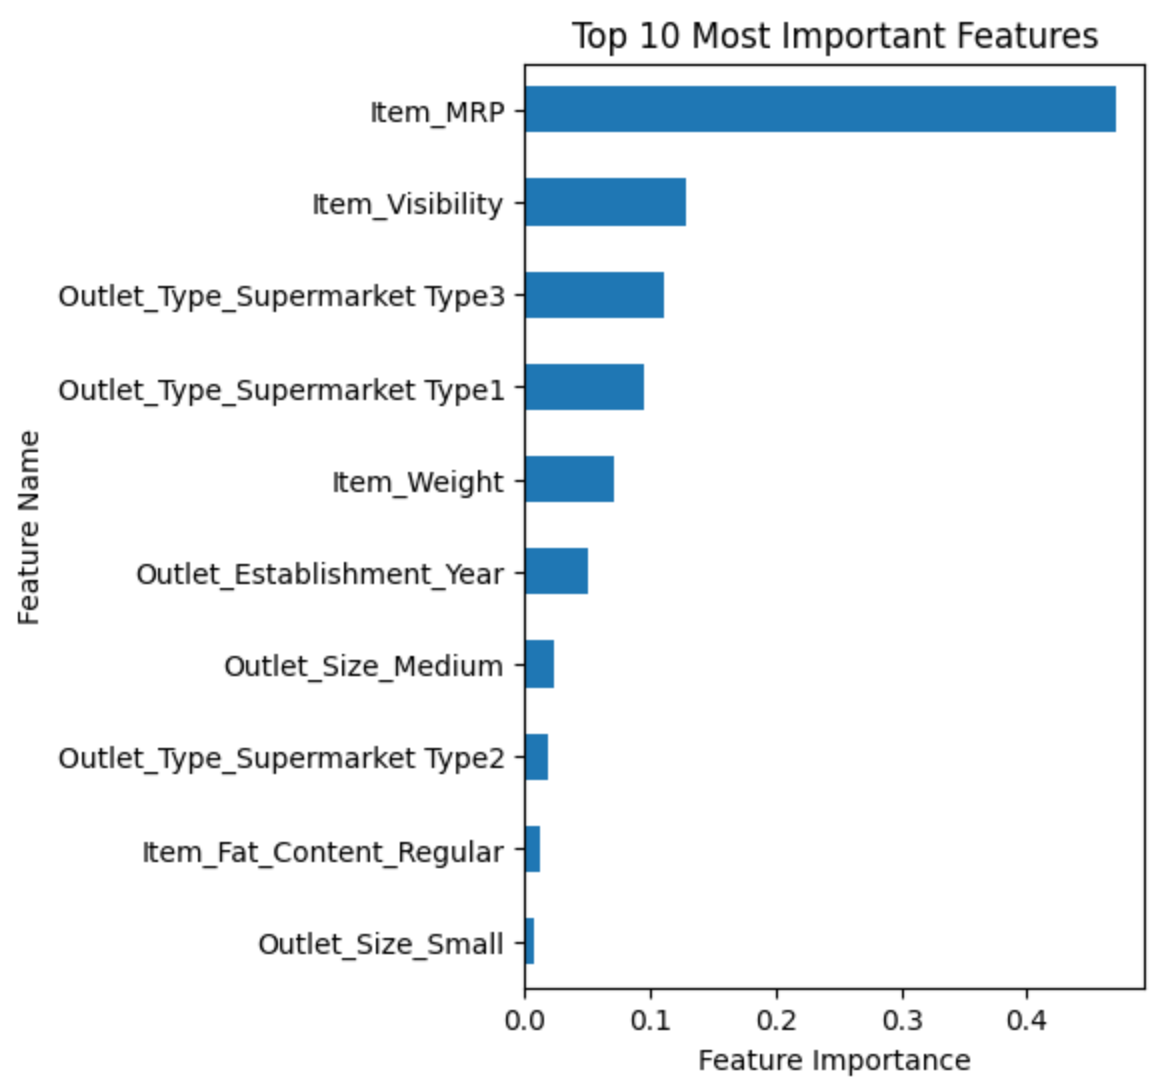




The most important features according to SHAP and the original feature importances differ. The top 5 most important features according to SHAP are Item_MRP, Outlet_Type_SuperMarket Type1, Outlet_Type_SuperMarket Type3, Item_Visibility, and Outlet_Establishment_Year.

According to our original important features, the most important features are Item_MRP, Item_Visibility, Outlet_Type_SuperMarket Type 3, Outlet_Type_SuperMarket Type1, and Item_Weight.

The only similiarity between the two is Item_MRP being the most important

### Dot Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


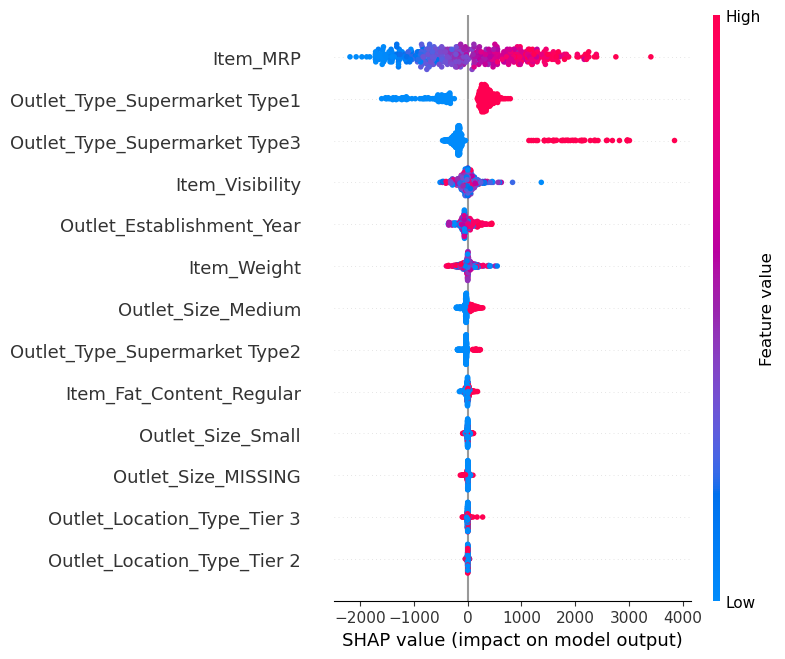

In [17]:
shap.summary_plot(shap_values,X_shap)

Item_MRP is the Maximum Retail Price (list price) of the product. The plot is pretty consistent with there being a relatively equal amount of high and low feature values for Item_MRP. This could inidcate that a higher MRP leads to a higher impact on Sales of Items.

Outlet_Type_SuperMarket Type1 tells us that there is a higher Sales Output Items sold in Outlet_Type_SuperMarket Type1. 

This is more evident Outlet_Type_SuperMarket Type3 since there is a greater difference between high and low features.

